In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as sm 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Please note, I am working on Google Colab and the file address would differ from system to system
data_doc_reports=pd.read_csv("/content/drive/MyDrive/Revolut Home Task/Revolut Ops Challenge/doc_reports.csv")
data_facial_similarity_reports=pd.read_csv("/content/drive/MyDrive/Revolut Home Task/Revolut Ops Challenge/facial_similarity_reports.csv")
data_doc_reports['created_at']=pd.to_datetime(data_doc_reports['created_at'])
data_facial_similarity_reports['created_at']=pd.to_datetime(data_facial_similarity_reports['created_at'])

In [ ]:
final_data=data_doc_reports.merge(data_facial_similarity_reports,on=data_doc_reports.index)

In [ ]:
final_data.drop(['key_0'],1,inplace=True)
dup_cols=[]
for i in final_data.columns:
  if "_y" in i or "_x" in i:
    org_name=i[:-2]
    dup_cols+=[org_name]
    
new_dup_list=[]
for item in dup_cols:
  if item in new_dup_list:
    continue
  else:
    new_dup_list+=[item]

dup_cols=new_dup_list
def is_equal_col(colA,colB,dataset):
  if dataset[colA].equals(dataset[colB]):
    return True
  return False

for i in dup_cols:
  if is_equal_col(i+'_y',i+'_x',final_data):
    final_data[i]=final_data[i+'_x']
    final_data.drop([i+'_x'],axis=1,inplace=True)
    final_data.drop([i+'_y'],axis=1,inplace=True)
    
final_data

,result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_x,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_x,police_record_result,compromised_document_result,properties_x,sub_result,result_y,face_comparison_result,created_at_y,facial_image_integrity_result,properties_y,attempt_id_y,Unnamed: 0,user_id,visual_authenticity_result
0,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,clear,clear,2017-06-20 23:12:58+00:00,clear,{},050a0596de424fab83c433eaa18b3f8d,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider
1,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20 23:16:04+00:00,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,1,15a84e8951254011b47412fa4e8f65b8,clear
2,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,clear,clear,2017-06-20 17:59:49+00:00,clear,{},f9f84f3055714d8e8f7419dc984d1769,2,ffb82fda52b041e4b9af9cb4ef298c85,clear
3,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,clear,clear,2017-06-20 17:59:39+00:00,clear,{},10a54a1ecf794404be959e030f11fef6,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear
4,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,2017-06-20 18:08:09+00:00,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,clear,clear,clear,clear,2017-06-20 22:25:53+00:00,clear,NaN,NaN,clear,clear,NaN,72a2cccc9e9942deb5274a16536bf2d0,clear,NaN,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,clear,clear,2017-06-20 22:25:53+00:00,clear,{},72a2cccc9e9942deb5274a16536bf2d0,181987,c7f99ee763bf45d289019c6ac2cbd919,clear
176400,clear,clear,clear,clear,2017-06-20 22:27:40+00:00,clear,NaN,NaN,clear,NaN,NaN,8c83017191204a3887c2d47ca2d998ce,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20 22:27:40+00:00,clear,{},8c83017191204a3887c2d47ca2d998ce,181988,8b47d72c363e4591861f523dd7487f20,clear
176401,clear,clear,clear,clear,2017-06-20 22:25:59+00:00,clear,NaN,NaN,clear,clear,NaN,bfea35bcb6a940118ca5816cd8ffcae7,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,clear,clear,2017-06-20 22:25:59+00:00,clear,{},bfea35bcb6a940118ca5816cd8ffcae7,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear
176402,clear,clear,clear,clear,2017-06-20 22:35:40+00:00,clear,NaN,NaN,clear,clear,NaN,9190cf28b35b425083bdb41e121822fe,clear,NaN,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear,clear,clear,2017-06-20 22:35:41+00:00,clear,{},9190cf28b35b425083bdb41e121822fe,181990,65c49a09d299486091b6586487679b87,clear


In [ ]:
for i in final_data.columns:
  if '_x' in i:
    new_name=i[:-2]+'_docs'
    final_data[new_name]=final_data[i]
    final_data.drop([i],axis=1,inplace=True)
  elif '_y' in i:
    new_name=i[:-2]+'_facial'
    final_data[new_name]=final_data[i]
    final_data.drop([i],axis=1,inplace=True)

In [ ]:
final_data=final_data[(final_data['result_docs']=="clear") | (final_data['result_docs']=="consider")]

In [ ]:
final_data

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,Unnamed: 0,user_id,visual_authenticity_result,result_docs,created_at_docs,attempt_id_docs,properties_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial
0,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,caution,clear,clear,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,2017-06-20 23:12:57+00:00,050a0596de424fab83c433eaa18b3f8d,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",clear,2017-06-20 23:12:58+00:00,{},050a0596de424fab83c433eaa18b3f8d
1,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,f69c1e5f45a64e50a26740b9bfb978b7,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 23:16:04+00:00,{},f69c1e5f45a64e50a26740b9bfb978b7
2,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,f9f84f3055714d8e8f7419dc984d1769,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,2017-06-20 17:59:49+00:00,{},f9f84f3055714d8e8f7419dc984d1769
3,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:38+00:00,10a54a1ecf794404be959e030f11fef6,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,2017-06-20 17:59:39+00:00,{},10a54a1ecf794404be959e030f11fef6
4,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,1f320d1d07de493292b7e0d5ebfb1cb9,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,2017-06-20 18:08:09+00:00,{},1f320d1d07de493292b7e0d5ebfb1cb9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,181987,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,2017-06-20 22:25:53+00:00,72a2cccc9e9942deb5274a16536bf2d0,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,2017-06-20 22:25:53+00:00,{},72a2cccc9e9942deb5274a16536bf2d0
176400,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,181988,8b47d72c363e4591861f523dd7487f20,clear,clear,2017-06-20 22:27:40+00:00,8c83017191204a3887c2d47ca2d998ce,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 22:27:40+00:00,{},8c83017191204a3887c2d47ca2d998ce
176401,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,2017-06-20 22:25:59+00:00,bfea35bcb6a940118ca5816cd8ffcae7,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,2017-06-20 22:25:59+00:00,{},bfea35bcb6a940118ca5816cd8ffcae7
176402,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,181990,65c49a09d299486091b6586487679b87,clear,clear,2017-06-20 22:35:40+00:00,9190cf28b35b425083bdb41e121822fe,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear,2017-06-20 22:35:41+00:00,{},9190cf28b35b425083bdb41e121822fe


In [ ]:
final_data_unq=final_data.copy(deep=True)

In [ ]:
final_data_unq.drop_duplicates(subset ="user_id", inplace = True)

In [ ]:
final_data_unq['target'] = (final_data_unq.result_facial == 'clear') & (final_data_unq.result_docs == 'clear')

In [ ]:
final_data_unq.shape

(142724, 26)

In [ ]:
from collections import Counter

Counter(final_data_unq.target)

Counter({False: 29645, True: 113079})

In [ ]:
kycfails_unq=final_data_unq.copy (deep=True)

In [ ]:
kycfails_unq = kycfails_unq[(kycfails_unq.result_docs== 'consider') | (kycfails_unq.result_facial == 'consider')] 

Text(0.5, 1.0, 'Histogram of KYC Fails by date')

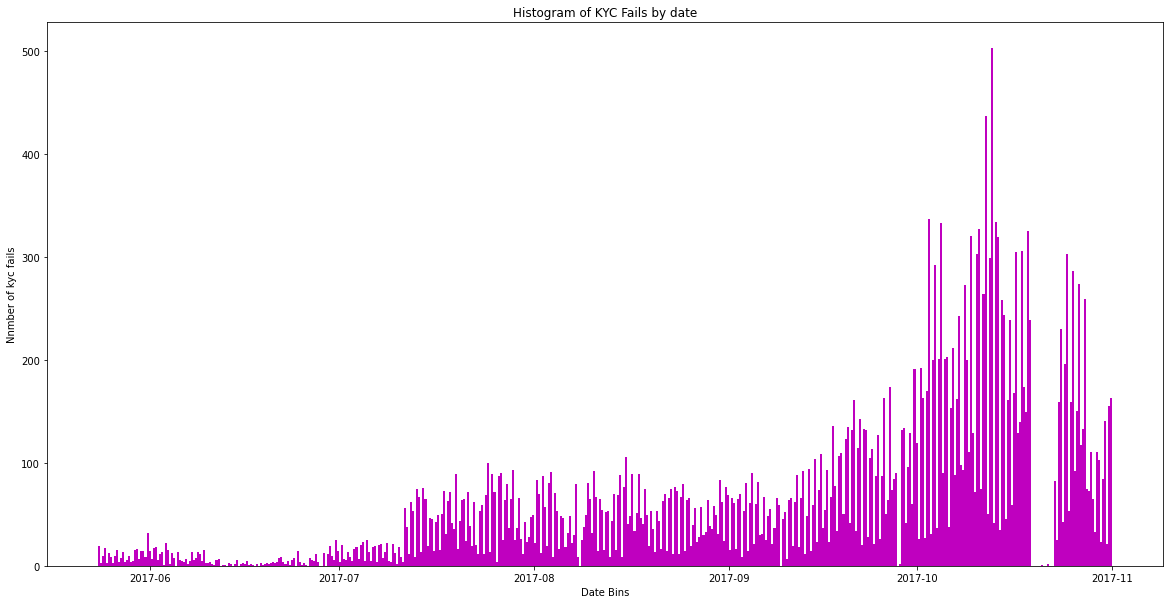

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(kycfails_unq.created_at_docs,500,color='m')
plt.xlabel("Date Bins")
plt.ylabel("Nnmber of kyc fails")
plt.title("Histogram of KYC Fails by date")

Text(0.5, 1.0, 'Histogram of KYC Fails in October')

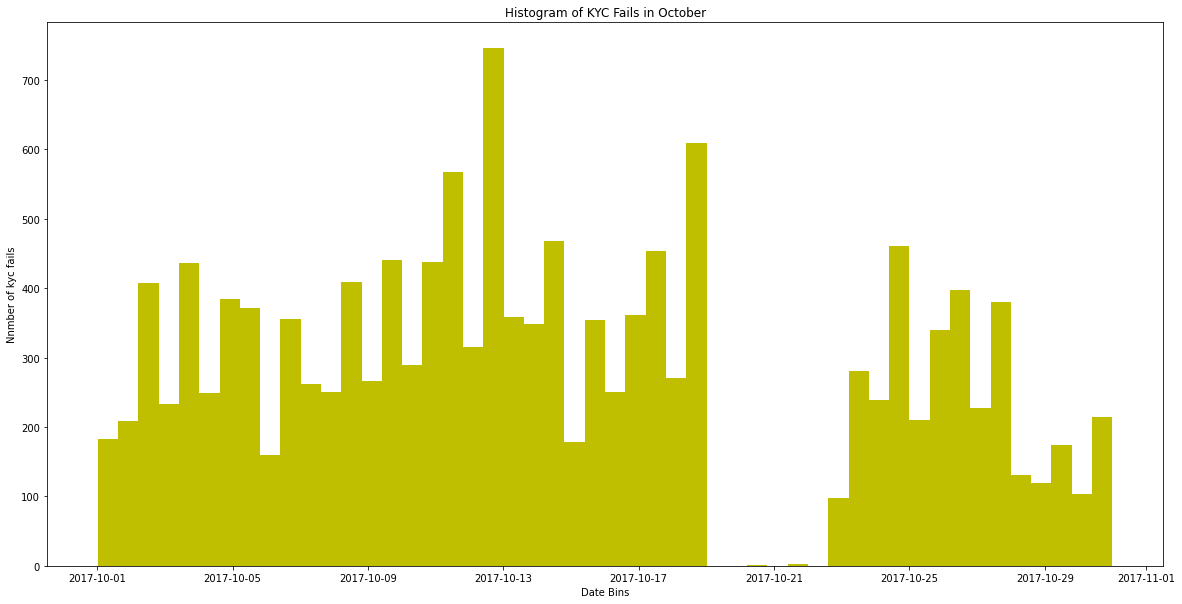

In [ ]:
plt.figure(figsize=(20,10))
oct17=kycfails_unq[(kycfails_unq['created_at_docs'] > '2017-10-01') & (kycfails_unq['created_at_docs'] < '2017-10-31')]
plt.hist(oct17.created_at_docs,50,color='y')
plt.xlabel("Date Bins")
plt.ylabel("Nnmber of kyc fails")
plt.title("Histogram of KYC Fails in October")


(array([5.990e+02, 5.300e+02, 6.610e+02, 4.740e+02, 5.690e+02, 4.350e+02,
        4.050e+02, 4.550e+02, 6.360e+02, 1.316e+03, 1.091e+03, 1.656e+03,
        1.863e+03, 2.827e+03, 2.037e+03, 2.933e+03, 3.088e+03, 3.955e+03,
        3.187e+03, 3.718e+03, 3.457e+03, 3.450e+03, 3.518e+03, 2.298e+03,
        3.591e+03, 2.980e+03, 3.502e+03, 2.814e+03, 3.311e+03, 2.725e+03,
        3.604e+03, 3.352e+03, 3.109e+03, 2.303e+03, 3.440e+03, 3.525e+03,
        3.320e+03, 3.444e+03, 3.405e+03, 3.290e+03, 4.383e+03, 5.766e+03,
        4.951e+03, 6.167e+03, 5.985e+03, 5.578e+03, 4.000e+00, 3.983e+03,
        4.916e+03, 4.118e+03]),
 array([736472.63405093, 736475.86129213, 736479.08853333, 736482.31577454,
        736485.54301574, 736488.77025694, 736491.99749815, 736495.22473935,
        736498.45198056, 736501.67922176, 736504.90646296, 736508.13370417,
        736511.36094537, 736514.58818657, 736517.81542778, 736521.04266898,
        736524.26991019, 736527.49715139, 736530.72439259, 736533.951633

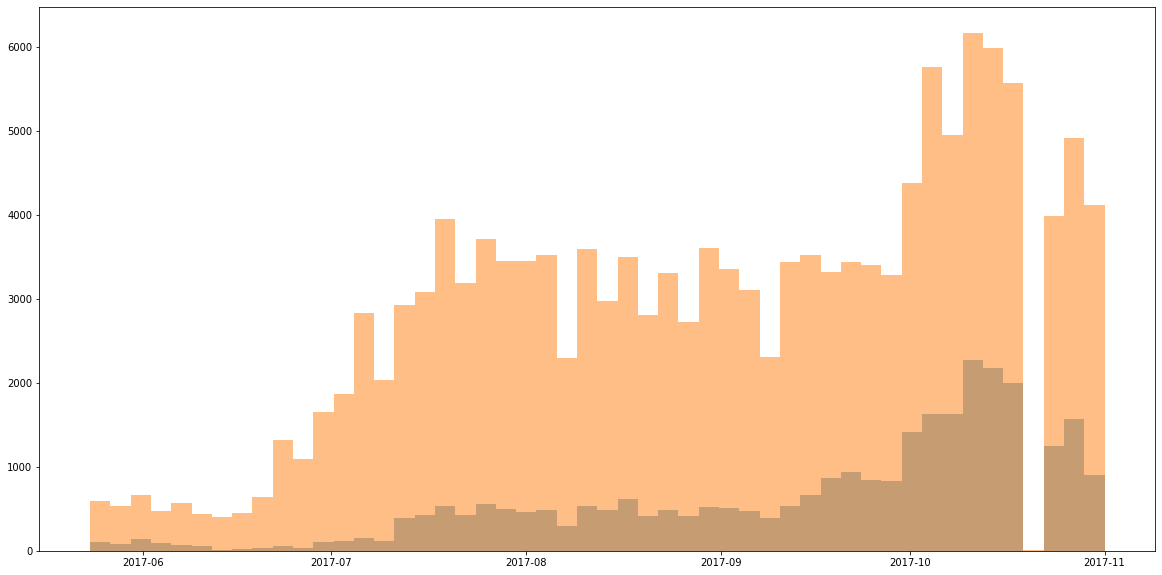

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(kycfails_unq.created_at_docs, 50, alpha=0.5)
plt.hist(final_data_unq.created_at_docs, 50, alpha=0.5)